In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
from model import QVISMTransparencyEngine, FloodDataPipeline, QuantumFloodCircuit, QGraphPredictor  # Replace with your module import

In [12]:
# Initialize quantum model and transparency engine
pipeline = FloodDataPipeline()
sample_graphs = pipeline.load_flood_data("/Users/santoshramesh/Desktop/QGraph/data/FloodGNN-GRU/train.npz")
sample = sample_graphs[0]
num_features = sample.x.shape[1] + sample.dynamic.shape[2]
quantum_circuit = QuantumFloodCircuit(num_features, sample.num_edges, active_edges=[])
predictor = QGraphPredictor(quantum_circuit)
qvism = QVISMTransparencyEngine(predictor)

Loaded 118 subgraphs from /Users/santoshramesh/Desktop/QGraph/data/FloodGNN-GRU/train.npz


In [21]:
# Generate transparency report
time_step = 38
report = qvism.generate_transparency_report(sample, time_step)

print("Flood Prediction Transparency Report")
print("====================================")
print(f"Timestamp: {report['timestamp']}")
print(f"Average Flood Risk: {report['average_flood_risk']:.6f} ({report['risk_level']})")
print(f"Temporal Drift: {report['temporal_drift']:.6f}")
print(f"Hilbert Space Overlap: {report['hilbert_space_overlap']:.6f}")
print(f"Active Edges: {report['active_edges']}")
print()

print("Edge Influences")
print("---------------")
for edge, influence in report['edge_influences'].items():
    print(f"  Edge {edge}: {influence:.6f}")
print()

print("Node Sensitivities")
print("------------------")
for node, sensitivity in report['node_sensitivities'].items():
    print(f"  Node {node}: {sensitivity:.6f}")

Flood Prediction Transparency Report
Timestamp: Time step 38
Average Flood Risk: 0.002930 (LOW)
Temporal Drift: 0.000000
Hilbert Space Overlap: 0.061830
Active Edges: 10

Edge Influences
---------------
  Edge 0: 0.000977
  Edge 1: 0.000977
  Edge 2: 0.002930
  Edge 3: 0.000977
  Edge 4: 0.000000

Node Sensitivities
------------------
  Node 0: 0.019531
  Node 1: 0.009766
  Node 2: 0.000000
  Node 3: 0.019531
  Node 4: 0.039062


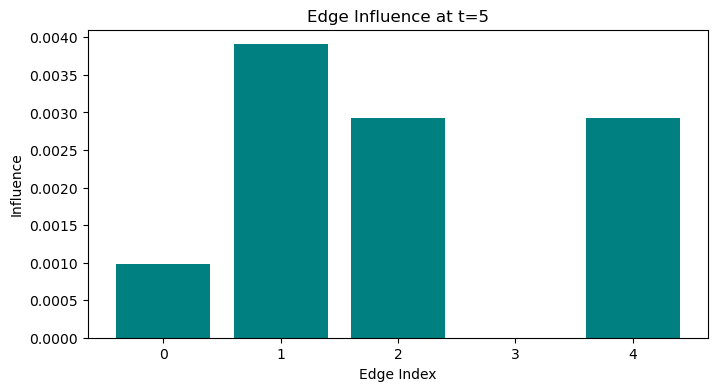

In [15]:
# Plot edge influence
edge_influences = report["edge_influences"]
plt.figure(figsize=(8, 4))
plt.bar(edge_influences.keys(), edge_influences.values(), color='teal')
plt.title("Edge Influence at t=5")
plt.xlabel("Edge Index")
plt.ylabel("Influence")
plt.show()

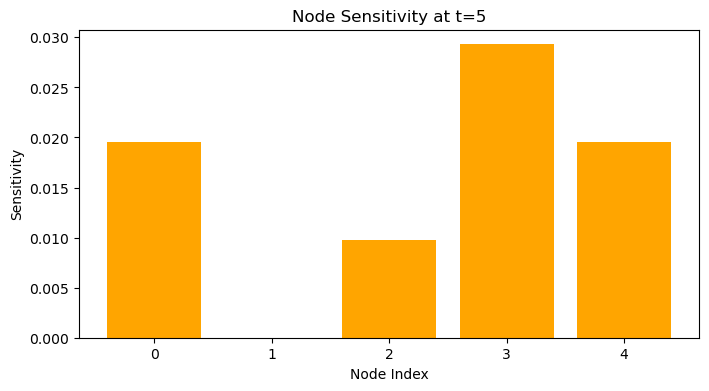

In [17]:

# Plot node sensitivity
node_sensitivities = report["node_sensitivities"]
plt.figure(figsize=(8, 4))
plt.bar(node_sensitivities.keys(), node_sensitivities.values(), color='orange')
plt.title("Node Sensitivity at t=5")
plt.xlabel("Node Index")
plt.ylabel("Sensitivity")
plt.show()

In [18]:
# Print summary
print("Transparency Report Summary:")
print(f"Time Step: {report['timestamp']}")
print(f"Average Flood Risk: {report['average_flood_risk']:.4f}")
print(f"Risk Level: {report['risk_level']}")
print(f"Active Edges: {report['active_edges']}")
print(f"Hilbert Space Overlap: {report['hilbert_space_overlap']:.4f}")

Transparency Report Summary:
Time Step: Time step 5
Average Flood Risk: 0.0039
Risk Level: LOW
Active Edges: 10
Hilbert Space Overlap: 0.0672
